ĐỌC DỮ LIỆU

In [6]:
import pandas as pd

In [7]:
patients = pd.read_csv("../data_clean/patient_info_clean.csv")
visits = pd.read_csv("../data_clean/visit_records_clean.csv")
billing = pd.read_csv("../data_clean/billing_info_clean.csv")

In [8]:
patients.head()

,patient_id,full_name,age,gender
0,BN100,Le Van C,30.0,F
1,BN101,Hoang Van E,35.0,M
2,BN102,Pham Thi D,50.0,M
3,BN103,Le Van C,25.0,F
4,BN104,Nguyen Van A,30.0,F


MERGE DỮ LIỆU

In [9]:
df = visits.merge(patients, on="patient_id", how="left")
df = df.merge(billing, on="visit_id", how="left")

df.head()

,visit_id,patient_id,visit_date,department,diagnosis,full_name,age,gender,total_fee,insurance_coverage
0,VK2000,BN104,2024-01-20,Nhi,Tieu Chay,Nguyen Van A,30.0,F,NaN,NaN
1,VK2001,BN106,2024-02-29,San,Dau Bung,Hoang Van E,25.0,F,12000000.0,0.8
2,VK2002,BN112,2024-03-04,San,Tieu Chay,Hoang Van E,25.0,F,NaN,NaN
3,VK2003,BN135,2024-01-28,Ngoai,Chua Ro,Nguyen Van A,30.0,F,NaN,NaN
4,VK2004,BN129,2024-04-19,Ngoai,Dau Bung,Nguyen Van A,25.0,M,2000000.0,0.5


CHIA NHÓM TUỔI


In [11]:
bins = [0, 18, 40, 60, 120]
labels = ["<18", "18-40", "40-60", ">60"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)
df[["age", "age_group"]].head()

,age,age_group
0,30.0,18-40
1,25.0,18-40
2,25.0,18-40
3,30.0,18-40
4,25.0,18-40


Pivot 1 – Chi phí trung bình theo khoa và nhóm tuổi


In [17]:
pivot_fee = pd.pivot_table(
    df,
    values="total_fee",      # dữ liệu cần tổng hợp
    index="department",      # xoay theo khoa (dòng)
    columns="age_group",     # xoay theo nhóm tuổi (cột)
    aggfunc="mean",          # hàm tổng hợp: trung bình
    observed=True            # tránh warning
)
pivot_fee

age_group,<18,18-40,40-60
department,,,
Ngoai,2000000.0,3.958333e+06,NaN
Nhi,NaN,5.964286e+06,2000000.0
Noi,6000000.0,6.611111e+06,3125000.0
San,NaN,3.857143e+06,2500000.0


Pivot 2 – Số lượt khám theo tháng và khoa

In [18]:
df["visit_date"] = pd.to_datetime(df["visit_date"])
df["month"] = df["visit_date"].dt.to_period("M")

In [19]:
pivot_visit = pd.pivot_table(
    df,
    values = "visit_id",
    index="month",
    columns="department",
    aggfunc="count",
    fill_value=0
)
pivot_visit

department,Ngoai,Nhi,Noi,San
month,,,,
2024-01,7,6,5,5
2024-02,3,7,5,3
2024-03,4,6,3,3
2024-04,4,4,4,8
2024-05,3,4,6,6
2024-06,4,7,6,7


Stack và Unstack dữ liệu Pivot

In [20]:
stacked = pivot_visit.stack()
stacked

month    department
2024-01  Ngoai         7
         Nhi           6
         Noi           5
         San           5
2024-02  Ngoai         3
         Nhi           7
         Noi           5
         San           3
2024-03  Ngoai         4
         Nhi           6
         Noi           3
         San           3
2024-04  Ngoai         4
         Nhi           4
         Noi           4
         San           8
2024-05  Ngoai         3
         Nhi           4
         Noi           6
         San           6
2024-06  Ngoai         4
         Nhi           7
         Noi           6
         San           7
dtype: int64

In [21]:
unstacked = stacked.unstack()
unstacked

department,Ngoai,Nhi,Noi,San
month,,,,
2024-01,7,6,5,5
2024-02,3,7,5,3
2024-03,4,6,3,3
2024-04,4,4,4,8
2024-05,3,4,6,6
2024-06,4,7,6,7


KHOA CÓ MẬT ĐỘ BỆNH NHÂN CAO NHẤT

In [24]:
df["department"].value_counts()

department
Nhi      34
San      32
Noi      29
Ngoai    25
Name: count, dtype: int64

NHẬN XÉT: Dựa theo kết quả thống kê số lượt khám theo khoa, KHOA NHI có mật độ bệnh nhân cao nhất với 34 lượt khám.

<Axes: title={'center': 'Số lượt khám theo khoa'}, xlabel='department'>

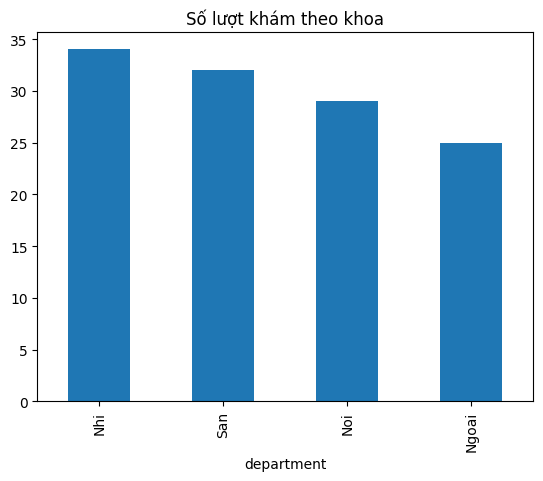

In [30]:
df["department"].value_counts().plot(
    kind="bar",
    title="Số lượt khám theo khoa"
)

<Axes: title={'center': 'Chi phí trung bình theo khoa và nhóm tuổi'}, xlabel='department'>

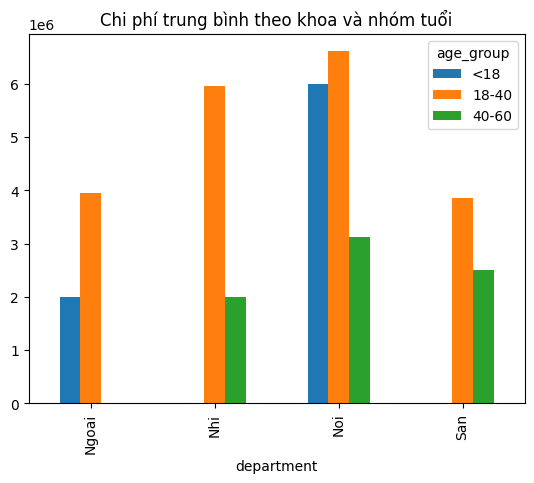

In [29]:
pivot_fee.plot(
    kind="bar",
    title="Chi phí trung bình theo khoa và nhóm tuổi"
)
